<a href="https://colab.research.google.com/github/PavelStelmakhV/hw304-csipy/blob/main/Hw4.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
from scipy import integrate

In [4]:
alpha = 0.5
beta = 0.3
N = 1_000_000
S0 = 990_000
I0 = 7000
R0 = 3000
t0, tf = 0, 25
t = np.linspace(t0, tf, 26)

## Susceptible

In [5]:
def dSdt(t, S):
    return -alpha * S

In [6]:
susceptible = solve_ivp(dSdt, (t0, tf), [S0], dense_output=True, t_eval=t)

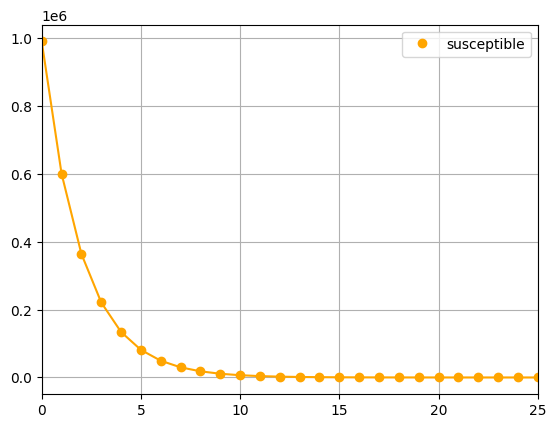

In [7]:
plt.plot(susceptible.t, susceptible.y[0], 'o', color='orange', label='susceptible')
plt.plot(susceptible.t, susceptible.sol(susceptible.t)[0], color='orange')
plt.legend()
plt.xlim(t0, tf)
# plt.ylim(0, 130)
plt.grid()

## Infected

In [8]:
def dIdt(t, I):
    return alpha * susceptible.sol(t)[0] - beta * I

In [9]:
infected = solve_ivp(dIdt, (t0, tf), [I0], dense_output=True, t_eval=t)

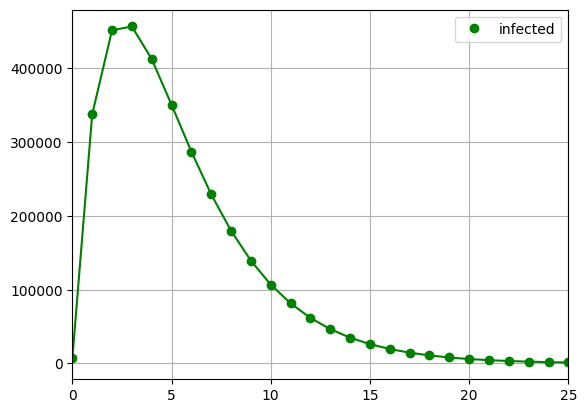

In [12]:
plt.plot(infected.t, infected.y[0], 'o', color='green', label='infected')
plt.plot(infected.t, infected.sol(infected.t)[0], color='green')
plt.legend()
plt.xlim(t0, tf)
# plt.ylim(0, 130)
plt.grid()

## Recovered

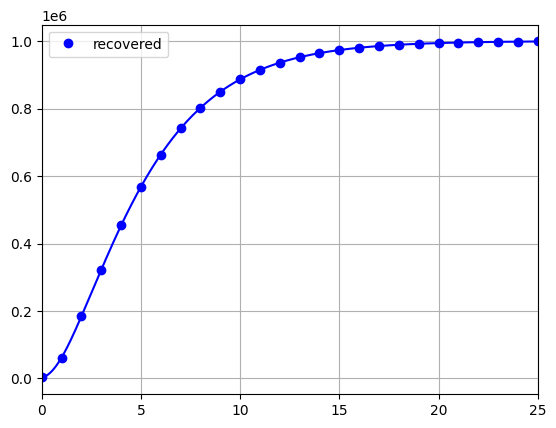

In [13]:
recovered = interp1d(susceptible.t, N - susceptible.y[0] - infected.y[0], kind='cubic')

plt.plot(susceptible.t, N - susceptible.y[0] - infected.y[0], 'o', color='blue', label='recovered')
more_date = np.linspace(t0, tf, 10000)
plt.plot(more_date, recovered(more_date), color='blue')
plt.legend()
plt.xlim(t0, tf)
plt.grid()

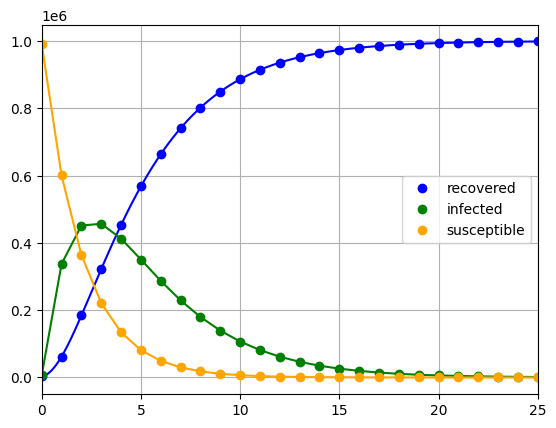

In [14]:
plt.plot(susceptible.t, N - susceptible.y[0] - infected.y[0], 'o', color='blue', label='recovered')
plt.plot(more_date, recovered(more_date), color='blue')

plt.plot(infected.t, infected.y[0], 'o', color='green', label='infected')
plt.plot(infected.t, infected.sol(infected.t)[0], color='green')

plt.plot(susceptible.t, susceptible.y[0], 'o', color='orange', label='susceptible')
plt.plot(susceptible.t, susceptible.sol(susceptible.t)[0], color='orange')

plt.legend()
plt.xlim(t0, tf)
plt.grid()

In [23]:
def temp(t):
  result = alpha / (beta-alpha) * S0 * np.exp(-alpha * t) + (I0 - alpha / (beta-alpha) * S0) * np.exp(-beta * t)
  return result

temp(20)

6039.898076323751